In [39]:
from networkx.drawing.nx_agraph import graphviz_layout
from nltk.corpus import wordnet as wn
import networkx as nx
import pygraphviz
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
lemmas_in_words  = set(i for i in wn.words())

In [4]:
seen = set()
wordnet_graph = nx.Graph(engine='sfdp', pack=True)
for word in tqdm(lemmas_in_words):
    wordnet_graph.add_node(word)
    for dw in wn.synsets(word):
        if not dw in seen:
            seen.add(dw)
            wordnet_graph.add_node(dw.name())
        wordnet_graph.add_edge(dw.name(), word)

100%|██████████| 147306/147306 [01:15<00:00, 1946.20it/s]


In [5]:
path = './wordnet_graph.p'
nx.write_gpickle(wordnet_graph, path)

In [6]:
# new cleaned wordnet graph

wordnet_graph_cleaned = nx.Graph(engine='sfdp', pack=True)

for word in tqdm(lemmas_in_words):
    wordnet_graph_cleaned.add_node(word)

for word in tqdm(lemmas_in_words):
    nb_list = [k for m in [n for n in wordnet_graph.neighbors(word)] for k in wordnet_graph.neighbors(m)]    
    for nb in nb_list:
        if wordnet_graph_cleaned.has_edge(word, nb) == False:
            wordnet_graph_cleaned.add_edge(word, nb)


100%|██████████| 147306/147306 [00:02<00:00, 67521.75it/s]


In [7]:
wordnet_graph_cleaned.size()

350180

In [7]:
path = './wordnet_graph_cleaned.p'
nx.write_gpickle(wordnet_graph_cleaned, path)

In [9]:
ps = [p for p in nx.all_shortest_paths(wo}rdnet_graph_cleaned, 'good', 'bad')]

In [10]:
for p in ps:
    print(p)

['good', 'sound', 'heavy', 'big', 'bad']
['good', 'sounder', 'heavy', 'big', 'bad']
['good', 'well', 'swelled', 'big', 'bad']
['good', 'sound', 'heavy', 'bigger', 'bad']
['good', 'sounder', 'heavy', 'bigger', 'bad']
['good', 'well', 'swelled', 'bigger', 'bad']


### check words near 'good'

In [15]:
ncc_good = nx.node_connected_component(wordnet_graph_cleaned, 'good')

In [18]:
# check words near 'good'
distance = 2
good_words = []
for word in tqdm(ncc_good):
    if nx.shortest_path_length(wordnet_graph_cleaned, 'good', word) <= distance:
        good_words.append(word)



100%|██████████| 32011/32011 [00:10<00:00, 2944.15it/s]


In [23]:
len(good_words)

311

In [26]:
subg_good = nx.Graph(wordnet_graph_cleaned.subgraph(good_words), engine = 'sfdp')

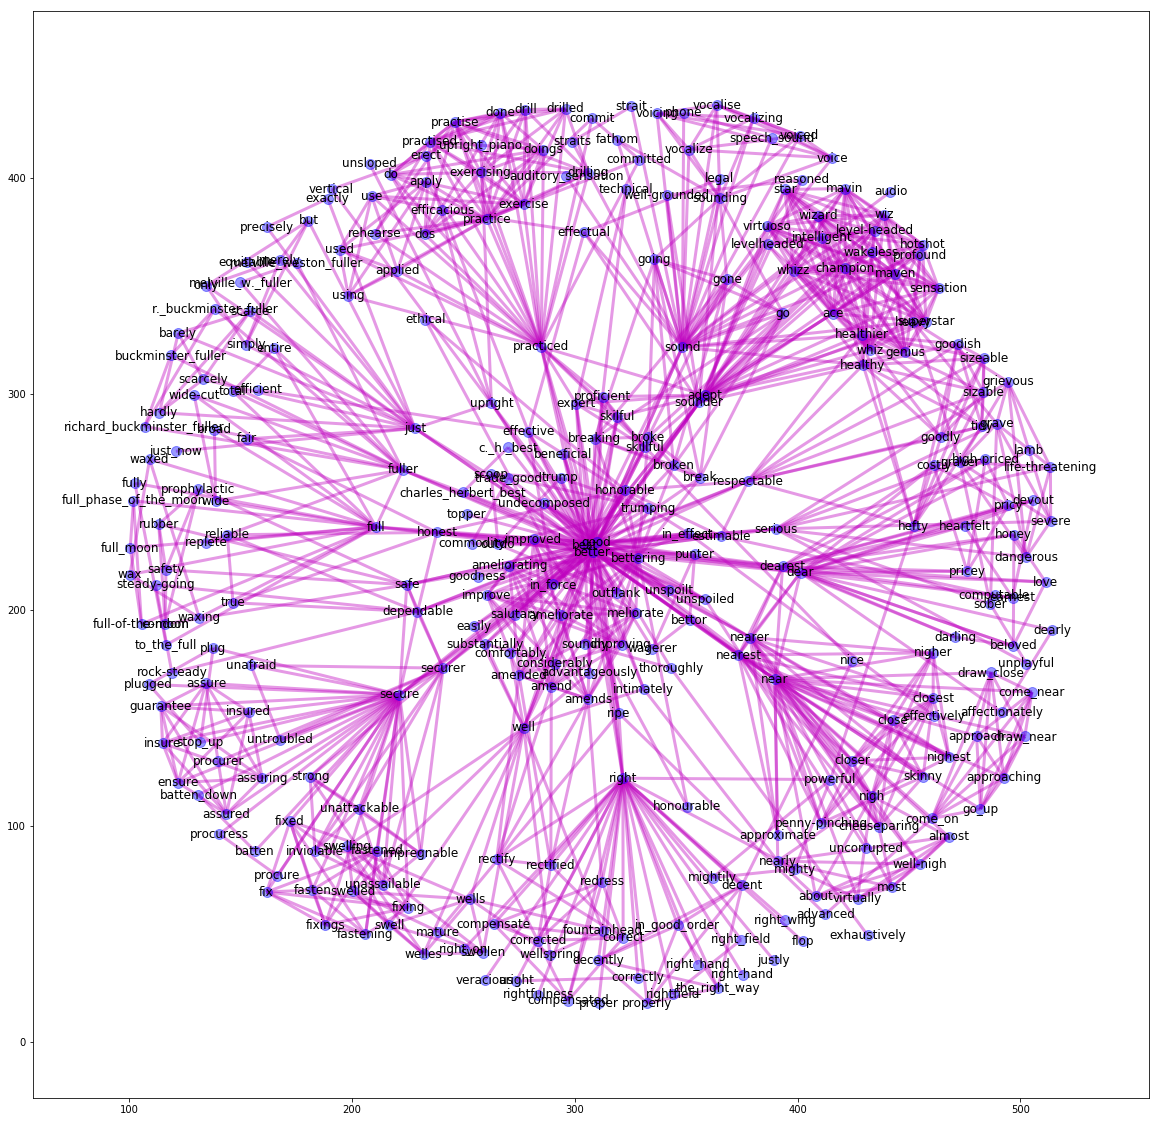

In [27]:
pos = graphviz_layout(subg_good)

plt.figure(figsize=(20, 20)) 

nx.draw_networkx_nodes(subg_good,pos,node_size=100,node_color='b',alpha=0.4)
nx.draw_networkx_edges(subg_good,pos,alpha=0.4,node_size=0,width=3,edge_color='m')
nx.draw_networkx_labels(subg_good,pos,fontsize=6)
plt.show()

### Separate graph for Noun, Verb, Adjective, Adverb

### ADJECTIVE

In [89]:
adj_lemmas_in_words = []
for word in tqdm(lemmas_in_words):
    if 'a' in [ss.pos() for ss in wn.synsets(word)]:
        adj_lemmas_in_words.append(word)
    elif 's' in [ss.pos() for ss in wn.synsets(word)]:
        adj_lemmas_in_words.append(word)
    else:
        continue

100%|██████████| 147306/147306 [00:07<00:00, 21003.48it/s]


In [90]:
len(adj_lemmas_in_words)

21593

In [91]:
# creating adjective ONLY graph

seen = set()
wordnet_graph_adj = nx.Graph(engine='sfdp', pack=True)

for word in tqdm(adj_lemmas_in_words):
    wordnet_graph_adj.add_node(word)
    for dw in wn.synsets(word):
        if dw.pos() == 'a' or dw.pos() == 's':
            if not dw in seen:
                seen.add(dw)
                wordnet_graph_adj.add_node(dw.name())
            wordnet_graph_adj.add_edge(dw.name(), word)
        

100%|██████████| 21593/21593 [00:00<00:00, 25284.25it/s]


In [92]:
# cleaned ADJ graph
wordnet_graph_adj_cleaned = nx.Graph(engine='sfdp', pack=True)

for word in tqdm(adj_lemmas_in_words):
    wordnet_graph_adj_cleaned.add_node(word)

for word in tqdm(adj_lemmas_in_words):
    nb_list = [k for m in [n for n in wordnet_graph_adj.neighbors(word)] for k in wordnet_graph_adj.neighbors(m)]    
    for nb in nb_list:
        if wordnet_graph_adj_cleaned.has_edge(word, nb) == False:
            wordnet_graph_adj_cleaned.add_edge(word, nb)


100%|██████████| 21593/21593 [00:00<00:00, 83771.71it/s]


Checking on 'good'

In [94]:
ncc_good = nx.node_connected_component(wordnet_graph_adj_cleaned, 'good')
distance = 2
good_words = []
for word in tqdm(ncc_good):
    if nx.shortest_path_length(wordnet_graph_adj_cleaned, 'good', word) <= distance:
        good_words.append(word)


100%|██████████| 4516/4516 [00:01<00:00, 3654.35it/s]


In [95]:
subg_good = nx.Graph(wordnet_graph_adj_cleaned.subgraph(good_words), engine = 'sfdp')

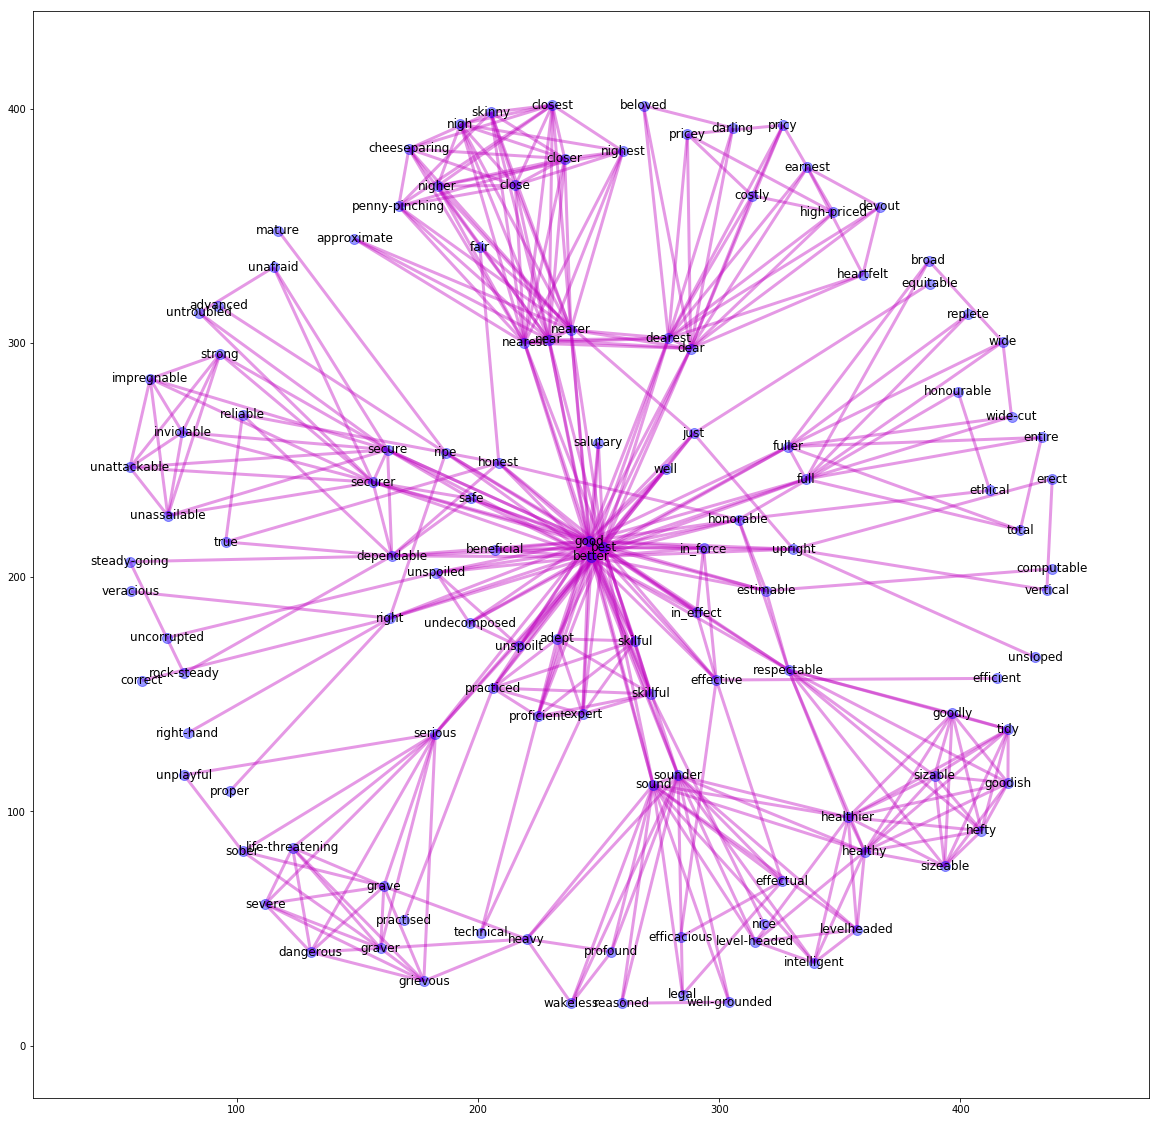

In [96]:
pos = graphviz_layout(subg_good)

plt.figure(figsize=(20, 20)) 
nx.draw_networkx_nodes(subg_good,pos,node_size=100,node_color='b',alpha=0.4)
nx.draw_networkx_edges(subg_good,pos,alpha=0.4,node_size=0,width=3,edge_color='m')
nx.draw_networkx_labels(subg_good,pos,fontsize=6)
plt.show()

### NOUN

In [97]:
noun_lemmas_in_words = []
for word in tqdm(lemmas_in_words):
    if 'n' in [ss.pos() for ss in wn.synsets(word)]:
        noun_lemmas_in_words.append(word)
    else:
        continue

100%|██████████| 147306/147306 [00:03<00:00, 37239.97it/s]


In [98]:
len(noun_lemmas_in_words)

117830

In [99]:
# creating noun ONLY graph
seen = set()
wordnet_graph_noun = nx.Graph(engine='sfdp', pack=True)

for word in tqdm(noun_lemmas_in_words):
    wordnet_graph_noun.add_node(word)
    for dw in wn.synsets(word):
        if dw.pos() == 'n':
            if not dw in seen:
                seen.add(dw)
                wordnet_graph_noun.add_node(dw.name())
            wordnet_graph_noun.add_edge(dw.name(), word)
        

100%|██████████| 117830/117830 [00:04<00:00, 24031.93it/s]


In [106]:
# cleaned Noun graph
wordnet_graph_noun_cleaned = nx.Graph(engine='sfdp', pack=True)

for word in tqdm(noun_lemmas_in_words):
    wordnet_graph_noun_cleaned.add_node(word)

for word in tqdm(noun_lemmas_in_words):
    nb_list = [k for m in [n for n in wordnet_graph_noun.neighbors(word)] for k in wordnet_graph_noun.neighbors(m)]    
    for nb in nb_list:
        if wordnet_graph_noun_cleaned.has_edge(word, nb) == False:
            wordnet_graph_noun_cleaned.add_edge(word, nb)


100%|██████████| 117830/117830 [00:01<00:00, 91914.10it/s]


### VERB

In [100]:
verb_lemmas_in_words = []
for word in tqdm(lemmas_in_words):
    if 'v' in [ss.pos() for ss in wn.synsets(word)]:
        verb_lemmas_in_words.append(word)
    else:
        continue

100%|██████████| 147306/147306 [00:03<00:00, 39050.99it/s]


In [101]:
len(verb_lemmas_in_words)

16107

In [102]:
# creating noun ONLY graph

seen = set()
wordnet_graph_verb = nx.Graph(engine='sfdp', pack=True)

for word in tqdm(verb_lemmas_in_words):
    wordnet_graph_verb.add_node(word)
    for dw in wn.synsets(word):
        if dw.pos() == 'v':
            if not dw in seen:
                seen.add(dw)
                wordnet_graph_verb.add_node(dw.name())
            wordnet_graph_verb.add_edge(dw.name(), word)
        

100%|██████████| 16107/16107 [00:00<00:00, 23080.03it/s]


In [108]:
# cleaned Verb graph
wordnet_graph_verb_cleaned = nx.Graph(engine='sfdp', pack=True)

for word in tqdm(verb_lemmas_in_words):
    wordnet_graph_verb_cleaned.add_node(word)

for word in tqdm(verb_lemmas_in_words):
    nb_list = [k for m in [n for n in wordnet_graph_verb.neighbors(word)] for k in wordnet_graph_verb.neighbors(m)]    
    for nb in nb_list:
        if wordnet_graph_verb_cleaned.has_edge(word, nb) == False:
            wordnet_graph_verb_cleaned.add_edge(word, nb)


100%|██████████| 16107/16107 [00:00<00:00, 38141.75it/s]


### ADVERB

In [120]:
adv_lemmas_in_words = []
for word in tqdm(lemmas_in_words):
    if 'r' in [ss.pos() for ss in wn.synsets(word)]:
        adv_lemmas_in_words.append(word)
    else:
        continue

100%|██████████| 147306/147306 [00:03<00:00, 39857.69it/s]


In [121]:
len(adv_lemmas_in_words)

4481

In [122]:
# creating adverb ONLY graph

seen = set()
wordnet_graph_adv = nx.Graph(engine='sfdp', pack=True)

for word in tqdm(adv_lemmas_in_words):
    wordnet_graph_adv.add_node(word)
    for dw in wn.synsets(word):
        if dw.pos() == 'r':
            if not dw in seen:
                seen.add(dw)
                wordnet_graph_adv.add_node(dw.name())
            wordnet_graph_adv.add_edge(dw.name(), word)
        

100%|██████████| 4481/4481 [00:00<00:00, 28904.79it/s]


In [123]:
# cleaned Adverb graph
wordnet_graph_adv_cleaned = nx.Graph(engine='sfdp', pack=True)

for word in tqdm(adv_lemmas_in_words):
    wordnet_graph_adv_cleaned.add_node(word)

for word in tqdm(adv_lemmas_in_words):
    nb_list = [k for m in [n for n in wordnet_graph_adv.neighbors(word)] for k in wordnet_graph_adv.neighbors(m)]    
    for nb in nb_list:
        if wordnet_graph_adv_cleaned.has_edge(word, nb) == False:
            wordnet_graph_adv_cleaned.add_edge(word, nb)


100%|██████████| 4481/4481 [00:00<00:00, 105272.25it/s]


In [124]:
print(nx.number_of_nodes(wordnet_graph_noun_cleaned))
print(nx.number_of_nodes(wordnet_graph_adj_cleaned))
print(nx.number_of_nodes(wordnet_graph_verb_cleaned))
print(nx.number_of_nodes(wordnet_graph_adv_cleaned))


117830
21593
16107
4481


### Check the largest connected component in each subgraph

In [132]:
len(max(nx.connected_components(wordnet_graph_adv_cleaned), key=len))

75

In [133]:
len(max(nx.connected_components(wordnet_graph_adj_cleaned), key=len))

4516

In [134]:
len(max(nx.connected_components(wordnet_graph_noun_cleaned), key=len))

13637

In [135]:
len(max(nx.connected_components(wordnet_graph_verb_cleaned), key=len))

9977

### Distance equation - EVA, PTA, ACT

In [18]:
def DIST(word, graph, p_word='good', n_word='bad'):
    if graph.has_node(word) and graph.has_node(p_word) and graph.has_node(n_word):

        if nx.has_path(graph, p_word, n_word):
            p_n = nx.shortest_path_length(graph, p_word, n_word)
        else:
#             print('No path between '+ n_word + ' and ' + p_word)
            return 0
        
        if nx.has_path(graph, word, n_word):
            n_w = nx.shortest_path_length(graph, n_word, word)
        else:
            return 0
#             n_w = 10000000 # very large number
        
        if nx.has_path(graph, word, p_word):
            p_w = nx.shortest_path_length(graph, p_word, word)
        else:
            return 0
#             p_w = 10000000 # very large number

#         print('distance to '+ n_word + ' : ' + str(n_w))
#         print('distance to '+ p_word + ' : ' + str(p_w))
#         print('distance between '+ n_word + ' and ' + p_word + ' : ' + str(p_n))
        return (n_w - p_w) / p_n
    else :
#         print(word + ' is not in the graph.')
        return 0

In [19]:
DIST('some', wordnet_graph_cleaned)

0.75

In [175]:
DIST('neutral', wordnet_graph_adj_cleaned)

-0.25

In [136]:
DIST('something', wordnet_graph_noun_cleaned)

something is not in the graph.


In [75]:
DIST('dog', wordnet_graph_cleaned)

distance to bad : 4
distance to good : 5
distance between bad and good : 4


-0.25

In [146]:
DIST('dog', wordnet_graph_noun_cleaned, 'positiveness', 'negativeness')

No path between negativeness and positiveness


In [76]:
DIST('love', wordnet_graph_cleaned)

distance to bad : 5
distance to good : 2
distance between bad and good : 4


0.75

In [77]:
DIST('honest', wordnet_graph_cleaned)

distance to bad : 5
distance to good : 1
distance between bad and good : 4


1.0

In [85]:
DIST('lie', wordnet_graph_cleaned, 'positive', 'negative')

distance to negative : 6
distance to positive : 5
distance between negative and positive : 7


0.14285714285714285

In [88]:
DIST('play', wordnet_graph_cleaned, 'active', 'passive')

distance to passive : 6
distance to active : 4
distance between passive and active : 7


0.2857142857142857

In [86]:
# ACT
DIST('love', wordnet_graph_cleaned, 'active', 'passive')

distance to passive : 6
distance to active : 4
distance between passive and active : 7


0.2857142857142857

### Use different words from lexicons to calculate averaged distance

In [158]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("positiveness"))

positiveness


In [159]:
# For example, 
print(DIST('positiveness', wordnet_graph_cleaned, 'positive', 'negative'))
print(DIST('love', wordnet_graph_cleaned, 'good', 'bad'))
print(DIST('love', wordnet_graph_cleaned, 'like', 'dislike'))
print(DIST('love', wordnet_graph_cleaned, 'love', 'hate'))

distance to negative : 10000000
distance to positive : 10000000
distance between negative and positive : 7
0.0
distance to bad : 5
distance to good : 2
distance between bad and good : 4
0.75
distance to dislike : 8
distance to like : 4
distance between dislike and like : 8
0.5
distance to hate : 8
distance to love : 0
distance between hate and love : 8
1.0


### Tweet sentiment experiment

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.feature_selection import SelectPercentile, chi2, SelectKBest, mutual_info_classif, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix, hstack
import numpy as np
import pprint
import time
import pandas as pd
%config IPCompleter.greedy=True

In [4]:
import os
file_path = "./dataset/semEval_train_2016/semeval_train_A.txt"
file = open(file_path,"r")
labels = []
tweets = []
for line in file:
    split_string = line.split("\t")
    if len(split_string) == 2:
        tweets.append(split_string[0])
        labels.append(split_string[1])
print(len(tweets))
print(len(labels))
print(tweets[0])

11692
11692
dec 21st 2012 will be know not as the end of the world but the Baby Boom! #2012shit


In [9]:
tweet = "RT @marcobonzanini: shit, just, don't an example fucking went going gone had! :D http://example.com #NLP"

In [7]:
bad_words = set(line.strip('\n') for line in open('slang_list.txt'))

In [8]:
bad_words

{'anal',
 'anus',
 'ballsack',
 'blow job',
 'blowjob',
 'boner',
 'clitoris',
 'cock',
 'cunt',
 'dick',
 'dildo',
 'dyke',
 'fag',
 'fuck',
 'jizz',
 'labia',
 'muff',
 'nigga',
 'nigger',
 'penis',
 'piss',
 'pussy',
 'scrotum',
 'sex',
 'shit',
 'slut',
 'smegma',
 'spunk',
 'twat',
 'vagina',
 'wank',
 'whore'}

### tweet preprocessor

In [10]:
import preprocessor as p
tweets_parsed = [p.parse(x) for x in tweets]

### Negation

In [11]:
import re
replace_dict = {
    "don't": "do not",
    "won't": "will not",
    "didn't": "did not",
    "doesn't": "does not",
    "can't": "can not",
    "couldn't": "could not",
    "isn't": "is not",
    "shouldn't": "should not",
    "wouldn't": "would not",
    "wasn't": "was not",
    "weren't": "were not",
    "haven't": "have not",
    "ain't": "is not",
    "aren't": "are not",
}

def replace_word(text):
    for word in replace_dict:
        if word in text:  # Small first letter
            text = text.replace(word, replace_dict[word])
        elif word[0].title() + word[1:] in text:  # Big first letter
            text = text.replace(word[0].title() + word[1:],
                                replace_dict[word][0].title() + replace_dict[word][1:])

    return text

def neg_tagging(string):
    transformed = re.sub(r'\b(?:not|never|no)\b[\w\s]+[^\w\s]', 
           lambda match: re.sub(r'(\s+)(\w+)', r'\1NEG_\2', match.group(0)), 
           string,
           flags=re.IGNORECASE)
    return transformed

tweet = "RT @marcobonzanini: just, don't an example went going gone had! :D http://example.com #NLP"
negged = neg_tagging(replace_word(tweet))
print(negged)

negged_tweets = [neg_tagging(replace_word(twt)) for twt in tweets]
print (negged_tweets[0])
cleaned_negged_tweets = [p.clean(x) for x in negged_tweets]
print(cleaned_negged_tweets[0])

RT @marcobonzanini: just, do not NEG_an NEG_example NEG_went NEG_going NEG_gone NEG_had! :D http://example.com #NLP
dec 21st 2012 will be know not NEG_as NEG_the NEG_end NEG_of NEG_the NEG_world NEG_but NEG_the NEG_Baby NEG_Boom! #2012shit
dec st will be know not NEG_as NEG_the NEG_end NEG_of NEG_the NEG_world NEG_but NEG_the NEG_Baby NEG_Boom!


In [12]:
tweet = "@MacMiller hate my life, because i can't see you at the roskilde festival on saturday, promise me to come back again, SOON."
negged = neg_tagging(replace_word(tweet))
print(negged)

@MacMiller hate my life, because i can not NEG_see NEG_you NEG_at NEG_the NEG_roskilde NEG_festival NEG_on NEG_saturday, promise me to come back again, SOON.


### Lemmatization for better results from Wordnet Graph

In [13]:
from nltk.tokenize import treebank
tokenizer = treebank.TreebankWordTokenizer()

Use alternative tokenizer

In [14]:
import re

emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
# def preprocess(s, lowercase=False):
#     tokens = tokenize(s)
#     if lowercase:
#         tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
#     return tokens


In [15]:
tweet = 'RT @marcobonzanini: This is just an example! :D http://example.com #NLP'
print(tokenize(tweet))
# ['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://example.com', '#NLP']

['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://example.com', '#NLP']


OR use nltk TweetTokenizer

In [16]:
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import nltk

In [17]:
tknzr = TweetTokenizer()

tweet = "RT @marcobonzanini: just, don't an example went going gone had! :D http://example.com #NLP"
tokenized_tweet = tknzr.tokenize(tweet)
print(tokenized_tweet)

['RT', '@marcobonzanini', ':', 'just', ',', "don't", 'an', 'example', 'went', 'going', 'gone', 'had', '!', ':D', 'http://example.com', '#NLP']


### WSD and POS tagging

#### MaxEnt POS tagger

In [18]:
tagged_tweet = nltk.pos_tag(tokenized_tweet)

In [19]:
tagged_tweet

[('RT', 'NNP'),
 ('@marcobonzanini', 'NNP'),
 (':', ':'),
 ('just', 'RB'),
 (',', ','),
 ("don't", 'VBD'),
 ('an', 'DT'),
 ('example', 'NN'),
 ('went', 'VBD'),
 ('going', 'VBG'),
 ('gone', 'VBN'),
 ('had', 'VBD'),
 ('!', '.'),
 (':D', 'JJ'),
 ('http://example.com', 'NN'),
 ('#NLP', 'NN')]

#### Lemmatize

#### Disambiguation

In [ ]:
'''
$ python
>>> from pywsd.lesk import simple_lesk
>>> sent = 'I went to the bank to deposit my money'
>>> ambiguous = 'bank'
>>> answer = simple_lesk(sent, ambiguous, pos='n')
>>> print answer
Synset('bank.n.09')
>>> print answer.definition()
u'a building in which the business of banking transacted
For all-words WSD, try:

>>> from pywsd import disambiguate
>>> from pywsd.similarity import max_similarity as maxsim
>>> disambiguate('I went to the bank to deposit my money')
[('I', None), ('went', Synset('run_low.v.01')), ('to', None), ('the', None), ('bank', Synset('depository_financial_institution.n.01')), ('to', None), ('deposit', Synset('deposit.v.02')), ('my', None), ('money', Synset('money.n.03'))]
>>> disambiguate('I went to the bank to deposit my money', algorithm=maxsim, similarity_option='wup', keepLemmas=True)
[('I', 'i', None), ('went', u'go', Synset('sound.v.02')), ('to', 'to', None), ('the', 'the', None), ('bank', 'bank', Synset('bank.n.06')), ('to', 'to', None), ('deposit', 'deposit', Synset('deposit.v.02')), ('my', 'my', None), ('money', 'money', Synset('money.n.01'))]

'''


In [57]:
tweet = 'RT @marcobonzanini: This is just an example! :D http://example.com #NLP'

In [80]:
from pywsd.lesk import simple_lesk
from pywsd import disambiguate
from pywsd.similarity import max_similarity as maxsim

'''
pos = pos if pos in ['a' adj, 'r' adverb, 's' satelite adj, 'n' noun, 'v' verb, None] else None
'''

"\npos = pos if pos in ['a'adj, 'r' adverb, 's'satelite adj, 'n' noun, 'v'verb, None] else None\n"

In [91]:
simple_lesk(p.clean(tweet), 'is')

Synset('exist.v.01')

In [95]:
## core processing
swn.senti_synset(simple_lesk(p.clean(tweet), 'is').name()).obj_score()

1.0

In [20]:
from nltk.wsd import lesk
from nltk.corpus import sentiwordnet as swn

In [62]:
wn.synsets('loves')

[Synset('love.n.01'),
 Synset('love.n.02'),
 Synset('beloved.n.01'),
 Synset('love.n.04'),
 Synset('love.n.05'),
 Synset('sexual_love.n.02'),
 Synset('love.v.01'),
 Synset('love.v.02'),
 Synset('love.v.03'),
 Synset('sleep_together.v.01')]

In [65]:
print(lesk('John loves Mary'.split(), 'loves', 'v'))

Synset('sleep_together.v.01')


In [22]:
lesk('John loves Mary'.split(), 'loves').name()

'sleep_together.v.01'

In [45]:
import preprocessor as p
p.clean(tweet)

': This is just an example!'

In [66]:
tagged_tweet = nltk.pos_tag(tokenized_tweet)

In [75]:
tmp = lesk(p.clean(tweet), 'an', )

In [76]:
tmp

Synset('associate_in_nursing.n.01')

In [72]:
swn.senti_synset(lesk(p.clean(tweet), 'just').name())

SentiSynset('just.r.03')

In [48]:
tmp

Synset('just.r.03')

In [49]:
senti_tmp = swn.senti_synset(tmp.name())

In [50]:
senti_tmp.pos_score()

0.0

In [51]:
wn.synsets('just')

[Synset('just.a.01'),
 Synset('equitable.a.01'),
 Synset('fair.a.01'),
 Synset('good.s.07'),
 Synset('merely.r.01'),
 Synset('precisely.r.01'),
 Synset('just.r.03'),
 Synset('just.r.04'),
 Synset('barely.r.01'),
 Synset('just.r.06')]

In [52]:
def get_swn_score(lemmatized_tweet):
    score = 0
    for lemma in tknzr.tokenize(lemmatized_tweet):
        curr_synset = lesk(lemmatized_tweet, lemma)
        if curr_synset is not None:
            curr_score = swn.senti_synset(curr_synset.name())
            print(curr_score)
            score += (curr_score.pos_score() - curr_score.neg_score())

        
'''
>>> breakdown.pos_score()
0.0
>>> breakdown.neg_score()
0.25
>>> breakdown.obj_score()
0.75
'''

'\n>>> breakdown.pos_score()\n0.0\n>>> breakdown.neg_score()\n0.25\n>>> breakdown.obj_score()\n0.75\n'

In [53]:
tweet

'RT @marcobonzanini: This is just an example! :D http://example.com #NLP'

In [54]:
tagged_tweet = nltk.pos_tag(tokenized_tweet)

In [55]:
tagged_tweet

[('RT', 'NNP'),
 ('@marcobonzanini', 'NNP'),
 (':', ':'),
 ('just', 'RB'),
 (',', ','),
 ("don't", 'VBD'),
 ('an', 'DT'),
 ('example', 'NN'),
 ('went', 'VBD'),
 ('going', 'VBG'),
 ('gone', 'VBN'),
 ('had', 'VBD'),
 ('!', '.'),
 (':D', 'JJ'),
 ('http://example.com', 'NN'),
 ('#NLP', 'NN')]

In [56]:
get_swn_score(p.clean(tweet))

<embody.v.02: PosScore=0.0 NegScore=0.0>
<just.r.03: PosScore=0.0 NegScore=0.0>
<associate_in_nursing.n.01: PosScore=0.0 NegScore=0.125>
<model.n.07: PosScore=0.0 NegScore=0.0>


In [40]:
from nltk.corpus import wordnet as wn

In [41]:
wn.synset('associate_in_nursing.n.01').lemmas()

[Lemma('associate_in_nursing.n.01.Associate_in_Nursing'),
 Lemma('associate_in_nursing.n.01.AN')]

In [42]:
wn.synsets('an')

[Synset('associate_in_nursing.n.01')]

In [41]:
text = word_tokenize("And now for something completely different")
print(text)
print(nltk.pos_tag(text))

['And', 'now', 'for', 'something', 'completely', 'different']
[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('different', 'JJ')]


In [51]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [55]:
lemmatizer = WordNetLemmatizer()
for t in tagged_tweet:
    if get_wordnet_pos(t[1]) != None:
        print(t)
        print(lemmatizer.lemmatize(t[0], get_wordnet_pos(t[1])))
        
    else:
        continue

('RT', 'NNP')
RT
('@marcobonzanini', 'NNP')
@marcobonzanini
('just', 'RB')
just
("don't", 'VBD')
don't
('example', 'NN')
example
('went', 'VBD')
go
('going', 'VBG')
go
('gone', 'VBN')
go
('had', 'VBD')
have
(':D', 'JJ')
:D
('http://example.com', 'NN')
http://example.com
('#NLP', 'NN')
#NLP


In [48]:
tagged_tweet

[('RT', 'NNP'),
 ('@marcobonzanini', 'NNP'),
 (':', ':'),
 ('just', 'RB'),
 (',', ','),
 ("don't", 'VBD'),
 ('an', 'DT'),
 ('example', 'NN'),
 ('went', 'VBD'),
 ('going', 'VBG'),
 ('gone', 'VBN'),
 ('had', 'VBD'),
 ('!', '.'),
 (':D', 'JJ'),
 ('http://example.com', 'NN'),
 ('#NLP', 'NN')]

In [33]:
import nltk.stem
nltk.stem.WordNetLemmatizer().lemmatize('loving')

'loving'

In [74]:
def get_score(sentence, graph):
    score = 0
#     tokenized_sent = [word for word in tokenizer.tokenize(neg_tagging(replace_word(sentence)))]
    tokenized_tweet = tknzr.tokenize(sentence)
    tagged_tweet = nltk.pos_tag(tokenized_tweet)
    
    def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return None
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_sent = []
    for t in tagged_tweet:
        if get_wordnet_pos(t[1]) != None:
#             print(t)
            print(lemmatizer.lemmatize(t[0], get_wordnet_pos(t[1])))
            lemmatized_sent.append(lemmatizer.lemmatize(t[0], get_wordnet_pos(t[1])))
        else:
            continue
    
    negged_lematized_sent = (neg_tagging(replace_word(' '.join(lemmatized_sent)))).split()
    
    for word in negged_lematized_sent:
        negation = False
        if word.startswith('NEG_'):
            print("negated : "b + word)
            negation = True
            word = word[4:]
        word = word.lower()
        word_score = DIST(word, graph, 'good', 'bad') + \
                    DIST(word, graph, 'positive', 'negative')
        if negation:
            word_score *= -1
        score += word_score
        print("   " + word + " : " + str(word_score))
    
    return score
    

In [75]:
for i in range(0,10):
    print(tweets[i])
    print("TOTAL SCORE : " + str(get_score(tweets[i], wordnet_graph_cleaned)) + " -> ACTUAL LABEL : " + labels[i])
    

dec 21st 2012 will be know not as the end of the world but the Baby Boom! #2012shit
dec
be
know
not
end
world
Baby
Boom
#2012shit
   dec : 0.0
   be : 0.14285714285714285
   know : 0.7857142857142857
   not : 0
negated : NEG_end
   end : -0.10714285714285715
negated : NEG_world
   world : 0.10714285714285715
negated : NEG_Baby
   baby : 0.8928571428571428
negated : NEG_Boom
   boom : -0.0
   #2012shit : 0
TOTAL SCORE : 1.8214285714285714 -> ACTUAL LABEL : neutral

@MacMiller hate my life, because i can't see you at the roskilde festival on saturday, promise me to come back again, SOON.
@MacMiller
hate
life
i
can't
see
roskilde
festival
saturday
promise
come
back
again
SOON
   @macmiller : 0
   hate : 0.14285714285714285
   life : 0.5357142857142857
   i : 0.75
   can : 0.14285714285714285
   not : 0
   see : 0.39285714285714285
   roskilde : 0
   festival : -0.10714285714285715
   saturday : -0.10714285714285715
   promise : 0.75
   come : 0.5357142857142857
   back : 0.285714285714285

In [72]:
for i in range(200,300):
    print(tweets[i])
    print("score : " + str(get_score(tweets[i], wordnet_graph_cleaned)) + " -> actual label : " + labels[i])
    

Marginal gains wins Le Tour - @bradwiggins wins Maillot Jaune, @markcavendish wins on the Champs for the 4th time #chapeau
   marginal : -0.2857142857142857
   gain : 0.5357142857142857
   win : 0.39285714285714285
   le : 0
   tour : 0.25
   @bradwiggins : 0
   win : 0.39285714285714285
   maillot : 0
   jaune : 0
   @markcavendish : 0
   win : 0.39285714285714285
   champs : 0
   4th : 0.0
   time : 0.0
   #chapeau : 0
score : 1.6785714285714284 -> actual label : positive

@tylerstime @marc_warnest @MisterMines @JuicyKills I saw him at Soundset, not a bad show. He is headlining with Har Mar Superstar.
   @tylerstime : 0
   @marc_warnest : 0
   @mistermines : 0
   @juicykills : 0
   saw : 0.39285714285714285
   soundset : 0
   not : 0
   bad : -1.1428571428571428
   show : 0.0
   be : 0.14285714285714285
   headline : 0
   har : 0
   mar : -1.0357142857142856
   superstar : 1.1428571428571428
score : -0.5 -> actual label : positive

"I'm fuckin Joel Skinners daughter!" "you mean the s

   show : 0.0
   be : 0.14285714285714285
   doa : 0
score : 0.6785714285714286 -> actual label : neutral

Sun going down over Lough Erne, beautiful. http://t.co/VoQXln04
   sun : -0.39285714285714285
   go : 0.25
   down : -0.39285714285714285
   lough : 0
   erne : 0
   beautiful : 0
   http://t.co/voqxln04 : 0
score : -0.5357142857142857 -> actual label : positive

@Alejandrah_S no where yet i just moved back i gotta go enrole tomorrow but im about to go to grad connect.
   @alejandrah_s : 0
   yet : 0.25
   i : 0.75
   just : 0.8571428571428572
   move : 0.25
   back : 0.2857142857142857
   i : 0.75
   gotta : 0
   go : 0.25
   enrole : 0
   tomorrow : 0
   im : 0
   go : 0.25
   grad : 0.17857142857142855
   connect : 0.5357142857142857
score : 4.357142857142857 -> actual label : neutral

Come see Sac Ay Lait this Friday at the Creative Alliance!... http://t.co/4qGj1Pup
   come : 0.5357142857142857
   see : 0.39285714285714285
   sac : 0.0
   ay : 0
   lait : 0
   friday : 0
   cr

In [73]:
for i in range(200,300):
    print(tweets[i])
    print("score : " + str(get_score(tweets[i], wordnet_graph_cleaned)) + " -> actual label : " + labels[i])
    

Marginal gains wins Le Tour - @bradwiggins wins Maillot Jaune, @markcavendish wins on the Champs for the 4th time #chapeau
   marginal : -0.2857142857142857
   gain : 0.5357142857142857
   win : 0.39285714285714285
   le : 0
   tour : 0.25
   @bradwiggins : 0
   win : 0.39285714285714285
   maillot : 0
   jaune : 0
   @markcavendish : 0
   win : 0.39285714285714285
   champs : 0
   4th : 0.0
   time : 0.0
   #chapeau : 0
score : 1.6785714285714284 -> actual label : positive

@tylerstime @marc_warnest @MisterMines @JuicyKills I saw him at Soundset, not a bad show. He is headlining with Har Mar Superstar.
   @tylerstime : 0
   @marc_warnest : 0
   @mistermines : 0
   @juicykills : 0
   saw : 0.39285714285714285
   soundset : 0
   not : 0
   bad : -1.1428571428571428
   show : 0.0
   be : 0.14285714285714285
   headline : 0
   har : 0
   mar : -1.0357142857142856
   superstar : 1.1428571428571428
score : -0.5 -> actual label : positive

"I'm fuckin Joel Skinners daughter!" "you mean the s

   @theotherbird : 0
   thanks : 0
   see : 0.39285714285714285
   warners : 0
   tomorrow : 0
score : 0.39285714285714285 -> actual label : positive

@quinlivan "and I waslike OMIGOD! FIRE! And then I waslike OMIGOD? You know? FIRE? And I was likeAH MAY ZING you know..hang on? texting"
   @quinlivan : 0
   " : 0
   waslike : 0
   fire : 0.0
   then : 0
   waslike : 0
   omigod : 0
   know : 0.7857142857142857
   fire : 0.0
   be : 0.14285714285714285
   likeah : 0
   may : 0
   zing : -0.42857142857142855
   know : 0.7857142857142857
   .. : 0
   hang : 0.14285714285714285
   texting : 0
   " : 0
score : 1.4285714285714284 -> actual label : negative

Did you miss the ESPY Awards on Wednesday? Check out the amazing tribute video to Pat Summitt. Rocky Top Books... http://t.co/6SnkV9oN
   did : 0
   miss : -0.25
   espy : -0.10714285714285715
   awards : 0
   wednesday : 0.6428571428571428
   check : 0.25
   amazing : 0.0357142857142857
   tribute : 0.0
   video : 0.0
   pat : -0.3928571

   go : 0.25
   sale : 0
   friday : 0
score : -0.3571428571428572 -> actual label : neutral

A player appearance will be taking place tomorrow at Westfield Parramatta. All the details are here: http://t.co/sp4tdBtC #GoWanderers
   player : -0.5
   appearance : 0.0
   be : 0.14285714285714285
   take : 0.14285714285714285
   place : 0.5357142857142857
   tomorrow : 0
   westfield : 0
   parramatta : 0
   detail : 0.0
   be : 0.14285714285714285
   here : 0
   http://t.co/sp4tdbtc : 0
   #gowanderers : 0
score : 0.46428571428571425 -> actual label : neutral

@manhatanProject I really liked it actually :) may not be happy that Miley's back but it's understandable why Mitchie would take her back
   @manhatanproject : 0
   really : 0.0
   like : 0.14285714285714285
   actually : 0.0
   :) : 0
   not : 0
negated : NEG_be
   be : -0.14285714285714285
negated : NEG_happy
   happy : -0.25
negated : NEG_Miley's
   miley's : 0
   back : 0.2857142857142857
   it's : 0
   understandable : 0
   mit

In [97]:
from string import punctuation

from nltk import word_tokenize
from nltk.corpus import wordnet as wn
from nltk.corpus import brown, stopwords


from pywsd.lesk import simple_lesk, original_lesk, cosine_lesk, adapted_lesk
from pywsd.similarity import max_similarity
from pywsd.utils import lemmatize
from pywsd.allwords_wsd import disambiguate

# # print "======== TESTING all-words lesk ===========\n"
# for sentence in brown.sents()[:10]:
#     # Retrieves a tokenized text from brown corpus.
#     sentence = " ".join(sentence)
#     # Annotate the full sentence.
#     print disambiguate(sentence, simple_lesk, prefersNone=True, keepLemmas=True)
#     print disambiguate(sentence, original_lesk)
#     print disambiguate(sentence, adapted_lesk, keepLemmas=True)
#     print disambiguate(sentence, cosine_lesk, prefersNone=True)
#     print
# print

# print "======== TESTING all-words path maxsim ===========\n"
# print "This is going to take some time, have some coffee...\n"
# for sentence in brown.sents()[0:1]:
#     # Retrieves a tokenized text from brown corpus.
#     sentence = " ".join(sentence)
#     # Annotate the full sentence.
#     print disambiguate(sentence, max_similarity, similarity_option='path')
#     print disambiguate(sentence, max_similarity, similarity_option='wup')
# print

# print "======== TESTING all-words info content maxsim ==========="
# print "===This is going to take some time, have some coffee...===\n"
for sentence in brown.sents()[0:1]:
    # Retrieves a tokenized text from brown corpus.
    sentence = " ".join(sentence)
    # Annotate the full sentence.
    print (disambiguate(sentence, max_similarity, similarity_option='lch'))
    print (disambiguate(sentence, max_similarity, similarity_option='res'))
    print (disambiguate(sentence, max_similarity, similarity_option='jcn'))
    print (disambiguate(sentence, max_similarity, similarity_option='lin'))


[('The', None), ('Fulton', Synset('fulton.n.01')), ('County', Synset('county.n.02')), ('Grand', Synset('thousand.n.01')), ('Jury', Synset('jury.n.02')), ('said', Synset('suppose.v.01')), ('Friday', Synset('friday.n.01')), ('an', None), ('investigation', Synset('probe.n.01')), ('of', None), ('Atlanta', Synset('atlanta.n.02')), ("'s", None), ('recent', None), ('primary', None), ('election', Synset('election.n.04')), ('produced', Synset('produce.v.06')), ('``', None), ('no', None), ('evidence', Synset('evidence.n.03')), ("''", None), ('that', None), ('any', None), ('irregularities', Synset('irregularity.n.03')), ('took', Synset('take.v.41')), ('place', Synset('topographic_point.n.01')), ('.', None)]
[('The', None), ('Fulton', Synset('fulton.n.01')), ('County', Synset('county.n.01')), ('Grand', Synset('thousand.n.01')), ('Jury', Synset('jury.n.02')), ('said', Synset('state.v.01')), ('Friday', Synset('friday.n.01')), ('an', None), ('investigation', Synset('investigation.n.02')), ('of', None

In [107]:
list = disambiguate('I went to the bank to deposit my money')
for item in list:
    print(item)
    if item[1]:
        print("    : " + item[1].definition())
    print("")

('I', None)

('went', Synset('run_low.v.01'))
    : to be spent or finished

('to', None)

('the', None)

('bank', Synset('bank.n.09'))
    : a building in which the business of banking transacted

('to', None)

('deposit', Synset('deposit.v.02'))
    : put into a bank account

('my', None)

('money', Synset('money.n.03'))
    : the official currency issued by a government or national bank



In [111]:
for so in ['lch', 'res', 'jcn', 'lin', 'path', 'wup']:
    print("-- " + so + " --")
    list = disambiguate('I went to the bank to deposit my money', max_similarity, similarity_option=so)
    for item in list:
        print(item)
        if item[1]:
            print("    : " + item[1].definition())
    print("")

-- lch --
('I', None)
('went', Synset('travel.v.01'))
    : change location; move, travel, or proceed, also metaphorically
('to', None)
('the', None)
('bank', Synset('savings_bank.n.02'))
    : a container (usually with a slot in the top) for keeping money at home
('to', None)
('deposit', Synset('deposit.v.02'))
    : put into a bank account
('my', None)
('money', Synset('money.n.03'))
    : the official currency issued by a government or national bank

-- res --
('I', None)
('went', Synset('travel.v.01'))
    : change location; move, travel, or proceed, also metaphorically
('to', None)
('the', None)
('bank', Synset('depository_financial_institution.n.01'))
    : a financial institution that accepts deposits and channels the money into lending activities
('to', None)
('deposit', Synset('situate.v.02'))
    : put (something somewhere) firmly
('my', None)
('money', Synset('money.n.01'))
    : the most common medium of exchange; functions as legal tender

-- jcn --
('I', None)
('went', Sy

In [116]:
i=0
for method in [simple_lesk, original_lesk, adapted_lesk, cosine_lesk]:
    i += 1
    print("--" + str(i))
    list = disambiguate('I went to the bank to deposit my money', method)
    for item in list:
        print(item)
        if item[1]:
            print("    : " + item[1].definition())
    print("")

--1
('I', None)
('went', Synset('run_low.v.01'))
    : to be spent or finished
('to', None)
('the', None)
('bank', Synset('bank.n.09'))
    : a building in which the business of banking transacted
('to', None)
('deposit', Synset('deposit.v.02'))
    : put into a bank account
('my', None)
('money', Synset('money.n.03'))
    : the official currency issued by a government or national bank

--2
('I', None)
('went', Synset('go.n.01'))
    : a time for working (after which you will be relieved by someone else)
('to', None)
('the', None)
('bank', Synset('bank.n.01'))
    : sloping land (especially the slope beside a body of water)
('to', None)
('deposit', Synset('deposit.n.01'))
    : the phenomenon of sediment or gravel accumulating
('my', None)
('money', Synset('money.n.01'))
    : the most common medium of exchange; functions as legal tender

--3
('I', None)
('went', Synset('run_low.v.01'))
    : to be spent or finished
('to', None)
('the', None)
('bank', Synset('bank.n.09'))
    : a build